A simple model using Scikit Learn to predict the CO2 Emmision of cars with different parameters.

## Importing the Required Libraries to use

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## About the dataset

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Loading the Dataset

In [2]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Feature selection

In [4]:
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


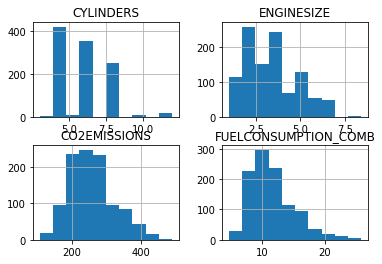

In [5]:
viz = data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

In [6]:
x=(data.drop(["CO2EMISSIONS"],1)).values
y=(data["CO2EMISSIONS"]).values
x.shape

(1067, 3)

### Creating training and test data from our dataset

In [7]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
print('Train Set', x_train.shape, y_train.shape)
print('Test Set', x_test.shape, y_test.shape)

Train Set (746, 3) (746,)
Test Set (321, 3) (321,)


### Building the model

In [8]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train, y_train)
#The Coefficients
print('Coefficients: ', model.coef_)
print('The Intercept: ', model.intercept_)

Coefficients:  [ 9.75670096  7.20902613 10.36988138]
The Intercept:  62.16020469632056


### Drawing Regression Line

In [9]:
# Reshaping y array to fit the line
y = np.repeat(y[..., np.newaxis], 3, -1)
y.shape

(1067, 3)

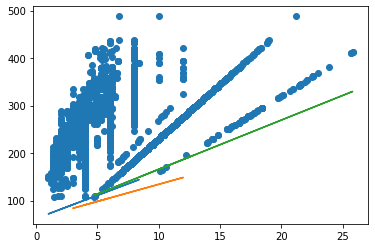

In [10]:
# Plotting the fit line
regressionLine = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, regressionLine)
plt.show()

### Model Evaluation

In [11]:
from sklearn.metrics import r2_score
y_hat=model.predict(x_test)
print('Mean absolute error: %.2f' %np.mean(np.absolute(y_hat - y_test)) )
print('Residual sum of squares(MSE): %.2f' %np.mean((y_hat - y_test)**2))
print('R_2 score: %.2f' %r2_score(y_hat, y_test))

Mean absolute error: 15.99
Residual sum of squares(MSE): 508.03
R_2 score: 0.86
